# **MDS**

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import gower

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS
from gower import gower_matrix  

In [15]:
ruta = '../data/train.csv'
df = pd.read_csv(ruta)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   TIENDA_ID                   951 non-null    int64  
 1   PLAZA_CVE                   951 non-null    int64  
 2   NIVELSOCIOECONOMICO_DES     951 non-null    object 
 3   ENTORNO_DES                 951 non-null    object 
 4   MTS2VENTAS_NUM              951 non-null    float64
 5   PUERTASREFRIG_NUM           951 non-null    int64  
 6   CAJONESESTACIONAMIENTO_NUM  951 non-null    int64  
 7   LATITUD_NUM                 951 non-null    float64
 8   LONGITUD_NUM                951 non-null    float64
 9   SEGMENTO_MAESTRO_DESC       944 non-null    object 
 10  LID_UBICACION_TIENDA        951 non-null    object 
 11  DATASET                     951 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 89.3+ KB


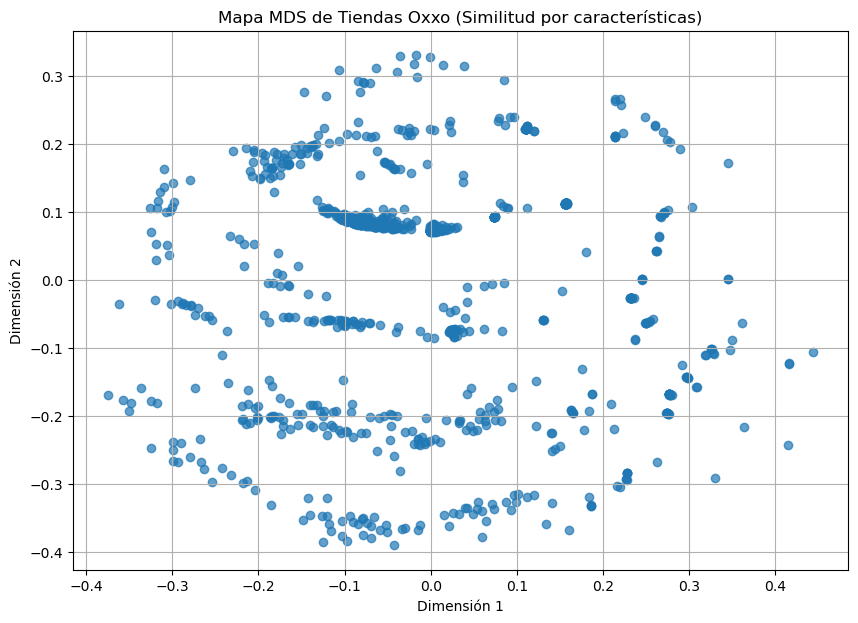

In [16]:
# Filtrar las columnas relevantes para Gower
cols_for_gower = [
    "MTS2VENTAS_NUM", "PUERTASREFRIG_NUM", "CAJONESESTACIONAMIENTO_NUM",
    "LATITUD_NUM", "LONGITUD_NUM",
    "NIVELSOCIOECONOMICO_DES", "ENTORNO_DES", "SEGMENTO_MAESTRO_DESC"
]

# Subconjunto de datos
df_mds = df[cols_for_gower].copy()

# Calcular la matriz de distancia de Gower
gower_dist = gower.gower_matrix(df_mds)

# Aplicar MDS (SMACOF) con disimilitudes precomputadas
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
mds_coords = mds.fit_transform(gower_dist)

# Graficar resultado sin colorear aún (no tenemos SUCCESS)
plt.figure(figsize=(10, 7))
plt.scatter(mds_coords[:, 0], mds_coords[:, 1], alpha=0.7)
plt.title("Mapa MDS de Tiendas Oxxo (Similitud por características)")
plt.xlabel("Dimensión 1")
plt.ylabel("Dimensión 2")
plt.grid(True)
plt.show()

In [20]:
ruta2 = '../data/Dataset_Train_limpio.csv'
df2 = pd.read_csv(ruta2)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   PLAZA_CVE                       909 non-null    int64  
 1   NIVELSOCIOECONOMICO_DES         909 non-null    int64  
 2   MTS2VENTAS_NUM                  909 non-null    float64
 3   PUERTASREFRIG_NUM               909 non-null    int64  
 4   CAJONESESTACIONAMIENTO_NUM      909 non-null    int64  
 5   LATITUD_NUM                     909 non-null    float64
 6   LONGITUD_NUM                    909 non-null    float64
 7   EXITOSA                         909 non-null    float64
 8   ENTORNO_Base                    909 non-null    bool   
 9   ENTORNO_Hogar                   909 non-null    bool   
 10  ENTORNO_Peatonal                909 non-null    bool   
 11  ENTORNO_Receso                  909 non-null    bool   
 12  SEGMENTO_Barrio Competido       909 

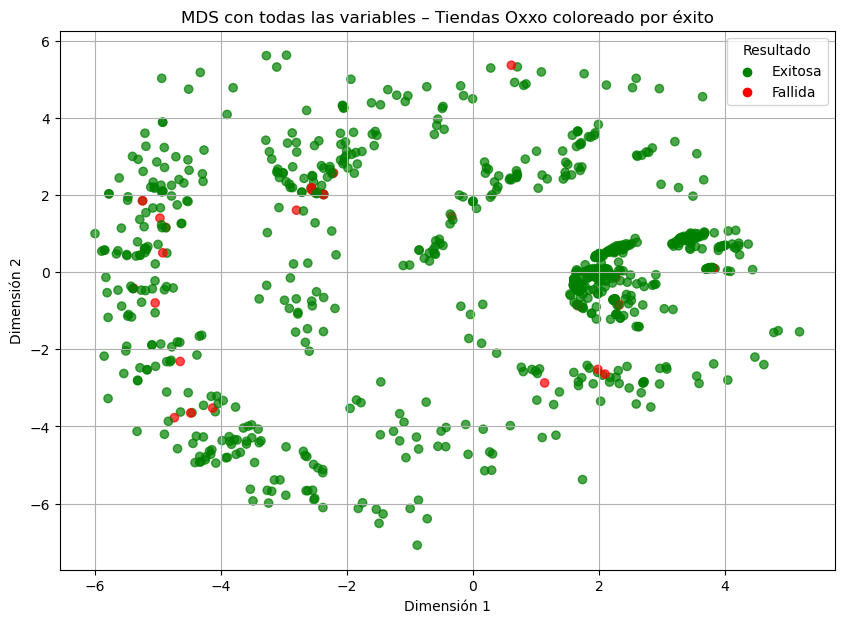

In [ ]:
# Excluir la columna de salida
X_full = df2.drop(columns=["EXITOSA"])

# Asegurar que todo esté en formato numérico (ya lo está)
# Normalizamos todo entre [0,1] para evitar sesgos por escala
X_scaled_full = MinMaxScaler().fit_transform(X_full)

# Distancia Manhattan entre filas (ideal para datos esparsos y dummies)
dist_matrix = pairwise_distances(X_scaled_full, metric='manhattan')

# MDS
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
mds_coords = mds.fit_transform(dist_matrix)

# Añadir al DataFrame original
df2["MDS_full_1"] = mds_coords[:, 0]
df2["MDS_full_2"] = mds_coords[:, 1]

# Graficar
plt.figure(figsize=(10, 7))
plt.scatter(df2["MDS_full_1"], df2["MDS_full_2"],
            c=df2["EXITOSA"].map({0.0: "red", 1.0: "green"}),
            alpha=0.7)

plt.scatter([], [], c="green", label="Exitosa")
plt.scatter([], [], c="red", label="Fallida")
plt.legend(title="Resultado")

plt.title("MDS con todas las variables – Tiendas Oxxo coloreado por éxito")
plt.xlabel("Dimensión 1")
plt.ylabel("Dimensión 2")
plt.grid(True)
plt.show()

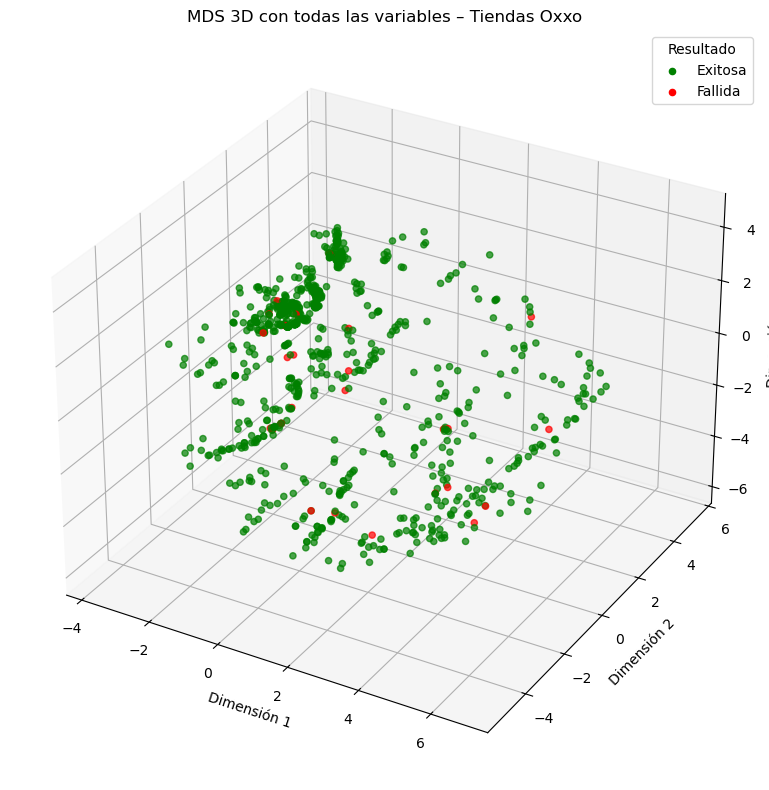

In [23]:
from mpl_toolkits.mplot3d import Axes3D

# Recalcular MDS con 3 dimensiones
mds_3d = MDS(n_components=3, dissimilarity='precomputed', random_state=42)
mds_coords_3d = mds_3d.fit_transform(dist_matrix)

# Agregar coordenadas al DataFrame
df2["MDS_3D_1"] = mds_coords_3d[:, 0]
df2["MDS_3D_2"] = mds_coords_3d[:, 1]
df2["MDS_3D_3"] = mds_coords_3d[:, 2]

# Graficar en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors_3d = df2["EXITOSA"].map({0.0: "red", 1.0: "green"})

scatter = ax.scatter(
    df2["MDS_3D_1"],
    df2["MDS_3D_2"],
    df2["MDS_3D_3"],
    c=colors_3d,
    alpha=0.7
)

# Leyenda
ax.scatter([], [], [], c="green", label="Exitosa")
ax.scatter([], [], [], c="red", label="Fallida")
ax.legend(title="Resultado")

ax.set_title("MDS 3D con todas las variables – Tiendas Oxxo")
ax.set_xlabel("Dimensión 1")
ax.set_ylabel("Dimensión 2")
ax.set_zlabel("Dimensión 3")
plt.tight_layout()
plt.show()